In [1]:
import h5py as h5
import arepo
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d

In [ ]:
beta = '08'
RC_list = ['5', '9', '20', '30', '40']
vphi_list = ['01', '02', '03']

sn = {}
prof = {}

for RC in RC_list:
    sn[RC] = {}
    prof[RC] = {}
    for vphi in vphi_list:
        outname = 'lvl5-beta'+beta+'-RC'+RC+'-vphi'+vphi+'/output'
        sn[RC][vphi] = arepo.Snapshot(outname)
        prof[RC][vphi] = gas_profile(sn[RC][vphi])

In [2]:
beta = '08'
RC_list = ['5', '9', '20', '30', '40']
vphi_list = ['01', '02', '03']

sfr = {}

for RC in RC_list:
    sfr[RC] = {}
    for vphi in vphi_list:
        outname = 'lvl5-beta'+beta+'-RC'+RC+'-vphi'+vphi+'/output'
        sfr[RC][vphi] = np.genfromtxt(outname + '/sfr.txt')

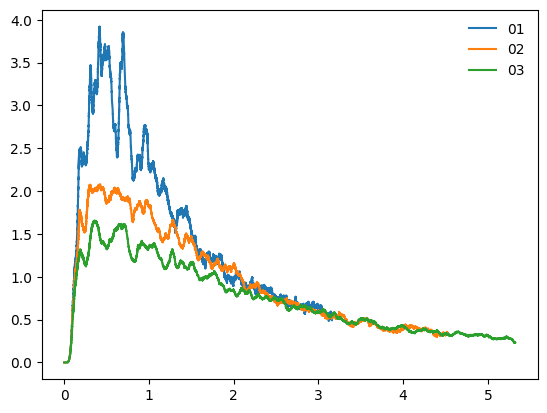

In [4]:
RC='9'

for vphi in vphi_list:
    plt.plot(sfr[RC][vphi][:,0], sfr[RC][vphi][:,2], label=vphi)

plt.legend(frameon=False)

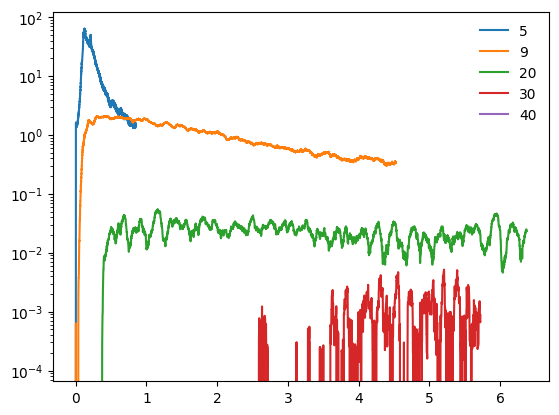

In [6]:
vphi='02'

for RC in RC_list:
    plt.plot(sfr[RC][vphi][:,0], sfr[RC][vphi][:,2], label=RC)

    plt.yscale('log')
    
plt.legend(frameon=False)

In [7]:
def weighted_median(values, weights):
    i = np.argsort(values)
    c = np.cumsum(weights[i])
    return values[i[np.searchsorted(c, 0.5 * c[-1])]]

def get_halfmass_radius(sn):
    center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
    
    if sn.NumPart_Total[4] == 0:
        return np.nan
    
    pos = sn.part4.pos.value - center
    mass = sn.part4.mass.value
    r = np.linalg.norm(pos, axis=1)
    
    is_star = sn.part4.GFM_StellarFormationTime > 0
    
    rhalf = weighted_median(r[is_star], mass[is_star])
    # print('mass below=', np.sum(mass[np.logical_and(is_star, r < rhalf)]))
    # print('mass above=', np.sum(mass[np.logical_and(is_star, r > rhalf)]))
    
    return rhalf

In [12]:
beta = '08'
RC='9'

sn_vphi = {}
time = {}
rhalf = {}

idx_list = np.arange(0, 101, 10)

for vphi in vphi_list:
    sn_vphi[vphi] = {}
    rhalf[vphi] = []
    time[vphi] = []
    for idx in tqdm(idx_list):
        outname = 'lvl5-beta'+beta+'-RC'+RC+'-vphi'+vphi+'/output'
        sn_vphi[vphi] = arepo.Snapshot(outname, idx)
        
        time[vphi].append(sn_vphi[vphi].Time.value)
        rhalf[vphi].append(get_halfmass_radius(sn_vphi[vphi]))

100%|██████████| 11/11 [00:02<00:00,  4.45it/s]


Text(0, 0.5, 'r_half [kpc]')

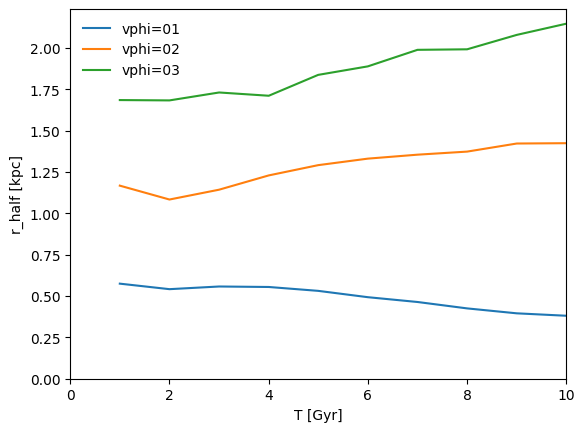

In [15]:
for vphi in vphi_list:
    plt.plot(time[vphi], rhalf[vphi], label='vphi='+vphi)

plt.legend(frameon=False)

plt.xlim(0, 10)
plt.ylim(0, None)

plt.xlabel('T [Gyr]')
plt.ylabel('r_half [kpc]')